# Credit Card Approvals

This notebook aims to build an automatic credit card approval predictor using machine learning techniques.

We will have to preprocess the dataset to ensure the machine learning model we choose can make good predictions.

After our data is in good shape, we will do some exploratory data analysis to build our intuitions.

Finally, we will build a machine learning model that can predict if an individual's application for a credit card will be accepted.

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Data information and Preparation

In [54]:
colnames=['Gender','Age','Debt','MaritalStatus','BankCustomer','Education','Ethinicity','YearsEmployed','PriorDefault','Employed','CreditScore','DriversLicense','Citizen','Zipcode','Income','ApprovalStatus']
cc_apps=pd.read_csv(r"C:\Users\manog\anaconda3\crx.data.csv", names=colnames,header=None)

In [55]:
cc_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    object 
 1   Age             690 non-null    object 
 2   Debt            690 non-null    float64
 3   MaritalStatus   690 non-null    object 
 4   BankCustomer    690 non-null    object 
 5   Education       690 non-null    object 
 6   Ethinicity      690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    object 
 9   Employed        690 non-null    object 
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    object 
 12  Citizen         690 non-null    object 
 13  Zipcode         690 non-null    object 
 14  Income          690 non-null    int64  
 15  ApprovalStatus  690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [56]:
cc_apps.isnull().values.any()

False

In [57]:
cc_apps=cc_apps.replace('?','NaN')

In [58]:
cc_apps.tail(17)

,Gender,Age,Debt,MaritalStatus,BankCustomer,Education,Ethinicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,Zipcode,Income,ApprovalStatus
673,NaN,29.50,2.000,y,p,e,h,2.000,f,f,0,f,g,00256,17,-
674,a,37.33,2.500,u,g,i,h,0.210,f,f,0,f,g,00260,246,-
675,a,41.58,1.040,u,g,aa,v,0.665,f,f,0,f,g,00240,237,-
676,a,30.58,10.665,u,g,q,h,0.085,f,t,12,t,g,00129,3,-
677,b,19.42,7.250,u,g,m,v,0.040,f,t,1,f,g,00100,1,-
678,a,17.92,10.210,u,g,ff,ff,0.000,f,f,0,f,g,00000,50,-
679,a,20.08,1.250,u,g,c,v,0.000,f,f,0,f,g,00000,0,-
680,b,19.50,0.290,u,g,k,v,0.290,f,f,0,f,g,00280,364,-
681,b,27.83,1.000,y,p,d,h,3.000,f,f,0,f,g,00176,537,-
682,b,17.08,3.290,u,g,i,v,0.335,f,f,0,t,g,00140,2,-


Replacing missing values

1. for numerical data we fill with the mean value

2. for categorical data, we fill with the most occuring value

In [59]:
cc_apps.fillna(cc_apps.mean(), inplace=True)

In [60]:
for col in cc_apps.columns:
    if cc_apps[col].dtypes == 'object':
        cc_apps = cc_apps.fillna(cc_apps[col].value_counts().index[0])


### Data visualization

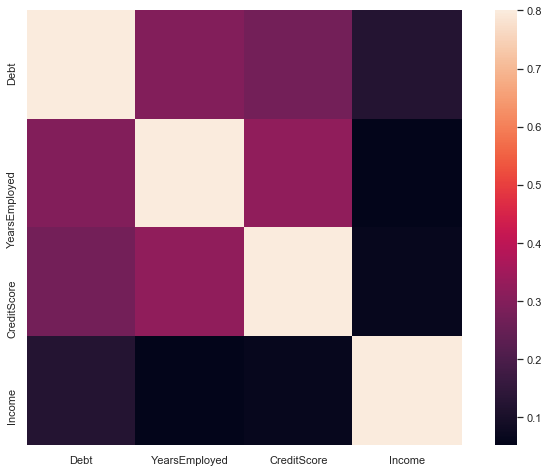

In [61]:
#correlation matrix
corrmat = cc_apps.corr()
f, ax = plt.subplots(figsize=(12,8))
sns.heatmap(corrmat, vmax=.8, square=True);


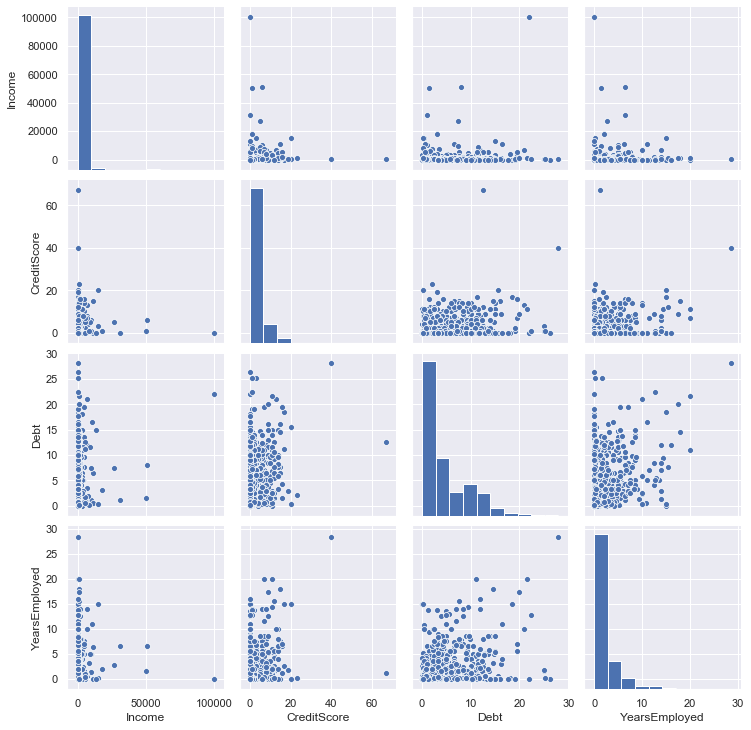

In [62]:
#scatterplot
sns.set()
cols = ['Income', 'CreditScore', 'Debt', 'YearsEmployed']
sns.pairplot(cc_apps[cols], size = 2.5)
plt.show();


In [63]:
#Label encoding: converting non-numeric values to numeric for faster computation
le=LabelEncoder()
for col in cc_apps.columns.values:
    if cc_apps[col].dtypes=='object':
        cc_apps[col]=le.fit_transform(cc_apps[col])

### Data modelling

In [64]:
cc_apps = cc_apps.drop(['DriversLicense', 'Zipcode'], axis=1)
cc_apps = cc_apps.values
X,y = cc_apps[:,0:13] , cc_apps[:,13]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [65]:
#Rescaling the values to a range of [0,1] for better understanding the results
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.transform(X_test)

In [66]:
rescaledX = scaler.transform(X)

### Random forest classifier

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
rf = RandomForestClassifier(n_estimators=500)
rf.fit(rescaledX_train, y_train)
y_pred = rf.predict(rescaledX_test)
print("Random Forest classifier has accuracy of: ", rf.score(rescaledX_test, y_test))
# Evaluate the confusion_matrix
confusion_matrix(y_test, y_pred)

Random Forest classifier has accuracy of:  0.8640350877192983


array([[ 87,  16],
       [ 15, 110]], dtype=int64)

### Important feature to determine approval

Feature ranking:
1. feature 8 (0.305139)
2. feature 7 (0.111098)
3. feature 10 (0.104149)
4. feature 2 (0.098186)
5. feature 12 (0.096350)
6. feature 1 (0.086432)
7. feature 5 (0.057528)
8. feature 9 (0.051851)
9. feature 6 (0.030920)
10. feature 3 (0.017634)
11. feature 0 (0.017048)
12. feature 4 (0.014557)
13. feature 11 (0.009108)


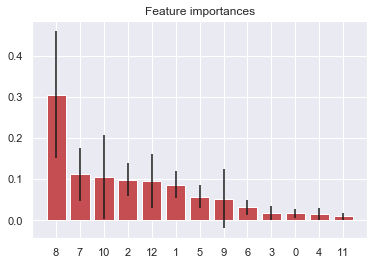

In [68]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

## Logistic Regression

In [69]:
logreg = LogisticRegression()
logreg.fit(rescaledX_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [70]:
y_pred = logreg.predict(rescaledX_test)
print("Accuracy of logistic regression classifier: ", logreg.score(rescaledX_test,y_test))
confusion_matrix(y_test,y_pred)

Accuracy of logistic regression classifier:  0.8377192982456141


array([[93, 10],
       [27, 98]], dtype=int64)

Grid search to improve the model's performance

In [71]:
tol = [0.01, 0.001 ,0.0001]
max_iter = [100, 150, 200]
param_grid = dict(tol=tol, max_iter=max_iter)
print(param_grid)

{'tol': [0.01, 0.001, 0.0001], 'max_iter': [100, 150, 200]}


### Finding the best performing model

In [72]:
grid_model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)
rescaledX = scaler.fit_transform(X)
grid_model_result = grid_model.fit(rescaledX, y)
best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_
print("Best: %f using %s" % (best_score, best_params))

Best: 0.852174 using {'max_iter': 100, 'tol': 0.01}


## Conclusion

Tried to find out the factors that are most important for getting an approval for the credit card.

Performed Logistic regression and Random forest

86% of accuracy was achieved through Random Forest

Tried to check if we can improve the performance further by Grid search. 

## Citations

https://learn.datacamp.com/

https://www.kaggle.com/datasets

https://github.com/ashishktripathi


    

## License

Copyright 2020 Manogjna Potluri

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.